Titanic Project Proposal: Will a Passenger Survive? 

Group 33 Members: Chloe Vaughan, Susan Zhang, James Drover, Olivia Klassen, and Adeeb Khan

Introduction

The RMS Titanic sank 5 days into her first trip in the Atlantic Ocean. Less than half of the passengers survived, and of those passengers,  many factors may have contributed to their survival or demise. In this project, we will read, wrangle, and classify the passengers data in order to predict if a given passenger would have been likely to die in the accident. We will also create visualizations to illustrate which variables may have played the biggest role in the survival of passengers and crew. Visualizations will be used to determine which predictor variables are of importance. 

Question: Given the observations for each predictor variable, will a passenger survive the incident (specify variables for predicigtons) be more specific, include questions on graphs.

In [1]:
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
boat_data <- read_csv("data/train.csv")
boat_data

Rows: 891 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Name, Sex, Ticket, Cabin, Embarked
dbl (7): PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NA,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NA,S


In [3]:
#getting rid of PassengerId,Name, Embarked,Ticket and Cabin:
boat_data_selected <- boat_data |>
    select(-PassengerId, -Name, -Embarked, -Ticket, -Cabin)
boat_data_selected


Survived,Pclass,Sex,Age,SibSp,Parch,Fare
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,3,male,22,1,0,7.2500
1,1,female,38,1,0,71.2833
1,3,female,26,0,0,7.9250
1,1,female,35,1,0,53.1000
0,3,male,35,0,0,8.0500
0,3,male,NA,0,0,8.4583
0,1,male,54,0,0,51.8625
0,3,male,2,3,1,21.0750
1,3,female,27,0,2,11.1333


In [4]:
#renaming columns

colnames(boat_data_selected) = c("Survived", "Passenger_Class", "Sex", "Age", "Number0fSiblings", "NumberofParents/children", "Fare")

In [5]:
#adding a column for sex in binary(for it to work with the knn model)

boat_data_binary <- boat_data_selected |>
    mutate(sex_binary = ifelse(Sex == "male", 1, ifelse(Sex == "female", 0, NA)))
nrow(boat_data_binary)
boat_data_binary

[1] 891

Survived,Passenger_Class,Sex,Age,Number0fSiblings,NumberofParents/children,Fare,sex_binary
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,3,male,22,1,0,7.2500,1
1,1,female,38,1,0,71.2833,0
1,3,female,26,0,0,7.9250,0
1,1,female,35,1,0,53.1000,0
0,3,male,35,0,0,8.0500,1
0,3,male,NA,0,0,8.4583,1
0,1,male,54,0,0,51.8625,1
0,3,male,2,3,1,21.0750,1
1,3,female,27,0,2,11.1333,0


In [6]:
#removing the columns with NA values for age.
#we see we only loose about 20 percent of 

boat_data_NA <- boat_data_binary |>
    filter(!is.na(Age))
nrow(boat_data_NA)
boat_data_NA

[1] 714

Survived,Passenger_Class,Sex,Age,Number0fSiblings,NumberofParents/children,Fare,sex_binary
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,3,male,22,1,0,7.2500,1
1,1,female,38,1,0,71.2833,0
1,3,female,26,0,0,7.9250,0
1,1,female,35,1,0,53.1000,0
0,3,male,35,0,0,8.0500,1
0,1,male,54,0,0,51.8625,1
0,3,male,2,3,1,21.0750,1
1,3,female,27,0,2,11.1333,0
1,2,female,14,1,0,30.0708,0


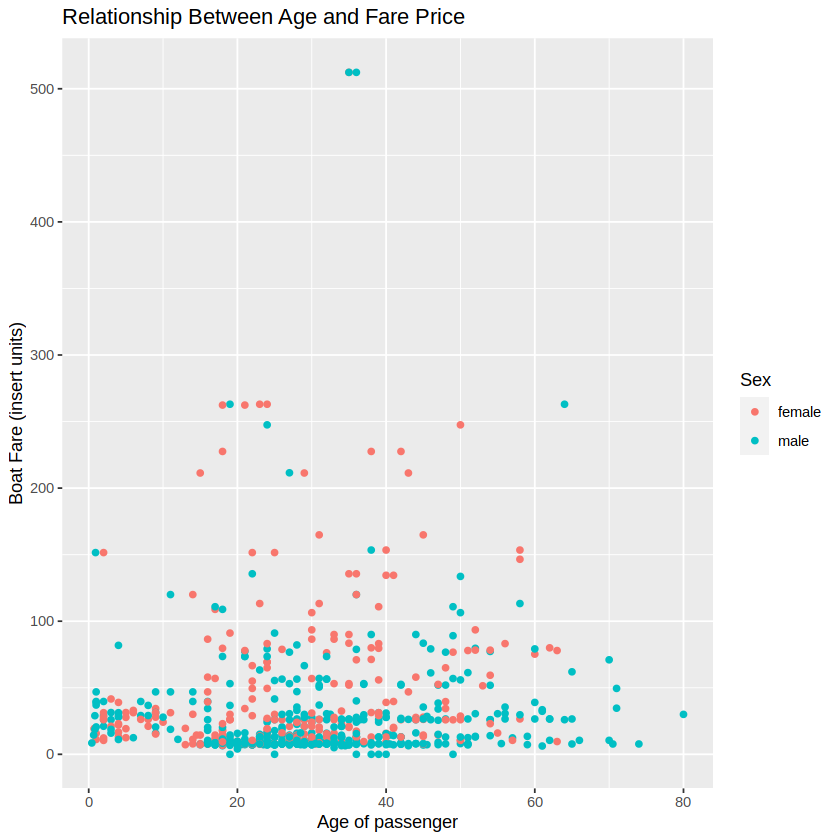

In [11]:
# visualisation (scatter plot) of the Fare vs age of passenger, colouring by sex.

fare_plot <- boat_data_NA |> ggplot(aes(x = Age, y = Fare, colour = Sex)) + 
    geom_point() + 
    labs(x = "Age of passenger", y = "Boat Fare (insert units)", colour = "Sex") +
    ggtitle("Relationship Between Age and Fare Price")

fare_plot

Survived,Passenger_Class,Sex,Age,Number0fSiblings,NumberofParents/children,Fare,sex_binary,Survived_char
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,3,male,22,1,0,7.2500,1,Did not survive
1,1,female,38,1,0,71.2833,0,Survived
1,3,female,26,0,0,7.9250,0,Survived
1,1,female,35,1,0,53.1000,0,Survived
0,3,male,35,0,0,8.0500,1,Did not survive
0,1,male,54,0,0,51.8625,1,Did not survive
0,3,male,2,3,1,21.0750,1,Did not survive
1,3,female,27,0,2,11.1333,0,Survived
1,2,female,14,1,0,30.0708,0,Survived


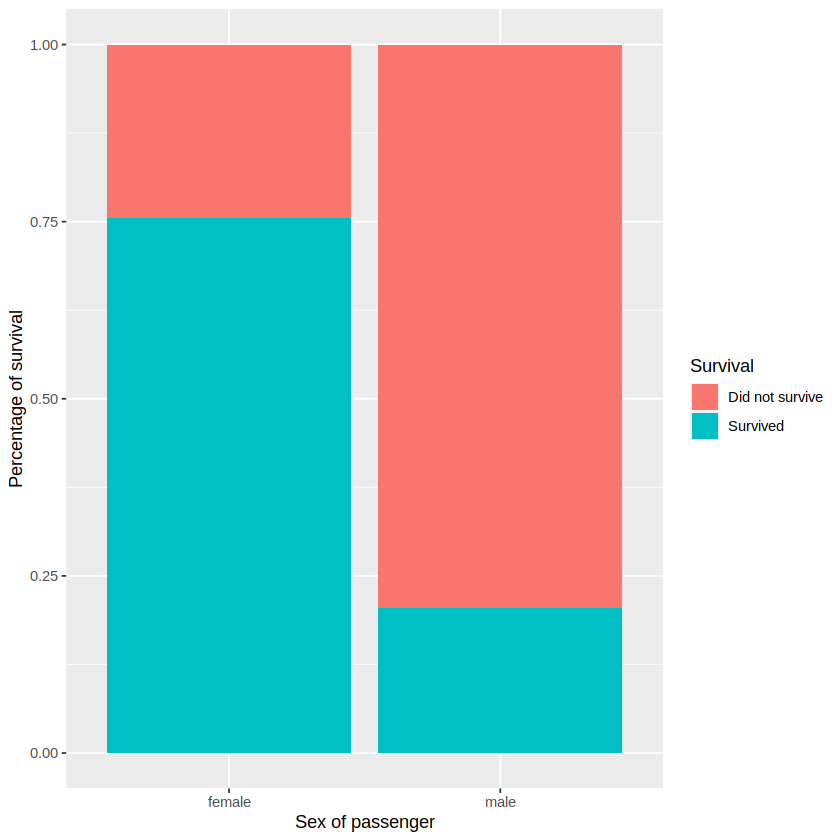

In [8]:
#bar graph to display how many people survived vs how many did not.(percentage of survival)

temp_data_graph <- boat_data_NA |>
    mutate(Survived_char = ifelse(Survived == 1, "Survived", ifelse(Survived == 0, "Did not survive", NA)))

temp_data_graph

survival_bar_plot <- ggplot(temp_data_graph, aes(x = Sex, fill = as_factor(Survived_char))) +
    geom_bar(position = "fill") +
    labs(x = "Sex of passenger", y = "Percentage of survival", fill = "Survival")

survival_bar_plot

In [9]:
#summary table for how many men and women are there.

summary_table_sex <- boat_data_NA |>
    group_by(Sex) |>
    summarize(Number_of_passengers = n())

summary_table_sex

Sex,Number_of_passengers
<chr>,<int>
female,261
male,453
